<a href="https://colab.research.google.com/github/hydrationn/Machine-DeepLearning/blob/main/20240404_%EC%8B%A4%EC%8A%B501_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pytorch, python version 확인

import torch
import sklearn

!python --version
print(torch.__version__)
print(sklearn.__version__)

Python 3.10.12
2.2.1+cu121
1.2.2


In [ ]:
# import package

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [ ]:
# import dataset

housing = fetch_california_housing()
print(housing.keys())
print(housing.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
# import dataset

x_data = housing.data
y_data = housing.target

print(x_data.shape)
print(y_data.shape)

(20640, 8)
(20640,)


In [ ]:
# Data preprocessing - train/test split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16512, 8)
(16512,)
(4128, 8)
(4128,)


In [ ]:
# Data preprocessing - normalization, tensor transformation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_tensor = torch.FloatTensor(x_train_scaled)
y_train_tensor = torch.FloatTensor(y_train)

x_test_tensor = torch.FloatTensor(x_test_scaled)
y_test_tensor = torch.FloatTensor(y_test)

In [ ]:
# Data preprocessing - batch generation

# 데이터 배치화
train_data = data_utils.TensorDataset(x_train_tensor, y_train_tensor)
dataloader = data_utils.DataLoader(train_data, batch_size=100, shuffle=True, drop_last=True)

# 데이터 확인
for batch_idx, (x_batch, y_batch) in enumerate(dataloader):
  print(batch_idx)
  print(x_batch.shape)
  print(y_batch.shape)
  break

0
torch.Size([100, 8])
torch.Size([100])


In [ ]:
# Parameters

# Parameter 정의
input_size = 8
output_size = 1
learning_rate = 0.01
n_epochs = 100

In [ ]:
# Model

# model 생성
model = nn.Linear(input_size, output_size)

# 손실함수 생성
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Train / Validation

# Running the model
train_loss = []
test_loss = []

for epoch in range(n_epochs+1):

  for idx, (x_batch, y_batch) in enumerate(dataloader):
    # Batch 학습
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_batch)
    y_pred = y_pred.reshape(-1)
    loss_train = criterion(y_pred, y_batch)
    loss_train.backward()
    optimizer.step()

    # Validation
    model.eval()
    y_test_pred = model(x_test_tensor)
    y_test_pred = y_test_pred.reshape(-1)
    loss_test = criterion(y_test_pred, y_test_tensor)

  train_loss.append(loss_train.item())
  test_loss.append(loss_test.item())
  print("epoch:{}, Loss_train:{:.2f}, Loss_test:{:.2f}".format(epoch, train_loss[-1], test_loss[-1]))

epoch:0, Loss_train:0.38, Loss_test:0.58
epoch:1, Loss_train:0.45, Loss_test:0.56
epoch:2, Loss_train:0.86, Loss_test:0.57
epoch:3, Loss_train:0.54, Loss_test:0.57
epoch:4, Loss_train:0.43, Loss_test:0.56
epoch:5, Loss_train:0.67, Loss_test:0.58
epoch:6, Loss_train:0.42, Loss_test:0.56
epoch:7, Loss_train:0.54, Loss_test:0.55
epoch:8, Loss_train:0.53, Loss_test:0.55
epoch:9, Loss_train:0.60, Loss_test:0.54
epoch:10, Loss_train:0.52, Loss_test:0.57
epoch:11, Loss_train:0.45, Loss_test:0.55
epoch:12, Loss_train:0.44, Loss_test:0.57
epoch:13, Loss_train:0.54, Loss_test:0.56
epoch:14, Loss_train:0.35, Loss_test:0.56
epoch:15, Loss_train:0.40, Loss_test:0.57
epoch:16, Loss_train:0.48, Loss_test:0.56
epoch:17, Loss_train:0.68, Loss_test:0.55
epoch:18, Loss_train:0.35, Loss_test:0.57
epoch:19, Loss_train:0.58, Loss_test:0.55
epoch:20, Loss_train:0.40, Loss_test:0.55
epoch:21, Loss_train:0.46, Loss_test:0.57
epoch:22, Loss_train:0.43, Loss_test:0.56
epoch:23, Loss_train:0.55, Loss_test:0.57
ep

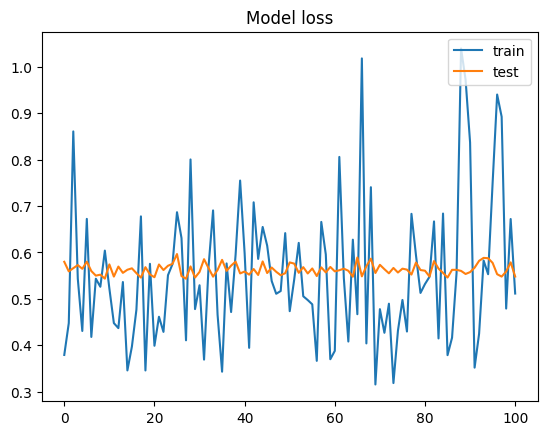

In [ ]:
# Plot

plt.figure()
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.title('Model loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Training result

model.state_dict()

OrderedDict([('weight',
              tensor([[ 0.8303,  0.1123, -0.2746,  0.2829, -0.0080, -0.0409, -0.9158, -0.8809]])),
             ('bias', tensor([2.0615]))])